Chapter 29  
# Gaussian Mixture Model
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture

## Define visualization function

In [5]:
def make_ellipses(gmm, ax):
    """
    Visualize the Gaussian components of a Gaussian Mixture Model (GMM)
    by drawing ellipses that represent the covariance of each component.
    """
    for j in range(0, K):
        # Select covariance matrix depending on covariance_type
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[j]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[j])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) 
            covariances = covariances * gmm.covariances_[j]
        
        # Use Singular Value Decomposition (SVD) to get eigenvalues and eigenvectors
        U, S, V_T = np.linalg.svd(covariances)
        # Compute the major and minor axes (ellipse radii)
        major, minor = 2 * np.sqrt(S)
        
        # Compute ellipse rotation angle in degrees
        angle = np.arctan2(U[1,0], U[0,0])
        angle = 180 * angle / np.pi  
        
        # Plot the Gaussian component mean
        ax.plot(gmm.means_[j, 0], gmm.means_[j, 1],
                 color='k', marker='x', markersize=10)

        # Plot the major axis direction vector
        ax.quiver(gmm.means_[j,0], gmm.means_[j,1],
                  U[0,0], U[1,0], scale=5/major)
        # scale: inversely scales arrow length

        # Plot the minor axis direction vector
        ax.quiver(gmm.means_[j,0], gmm.means_[j,1], 
                  U[0,1], U[1,1], scale=5/minor)
        
        # Draw ellipses at multiple scales (for visual clarity)
        for scale in np.array([3, 2, 1]):
            ell = Ellipse(
                xy=gmm.means_[j, :2],          # center of ellipse
                width=scale * major,           # major axis
                height=scale * minor,          # minor axis
                angle=angle,                   # rotation angle (must be keyword)
                color=rgb[j, :],
                alpha=0.18
            )
            ax.add_artist(ell)

## Generate grid data

In [7]:
x1_array = np.linspace(4, 8, 101)
x2_array = np.linspace(1, 5, 101)
xx1, xx2 = np.meshgrid(x1_array, x2_array)

## Load Iris dataset (only first two features)

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]

## Set parameters

In [11]:
K = 3  # Number of clusters
# Covariance structure types for GaussianMixture
covariance_types = ['tied', 'spherical', 'diag', 'full']

# Define custom color map for clusters
rgb = [[255, 51, 0], 
       [0, 153, 255],
       [138, 138, 138]]
rgb = np.array(rgb) / 255.
cmap_bold = ListedColormap(rgb)

## GMM clustering and visualization

C:\Users\james\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\james\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\james\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\james\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

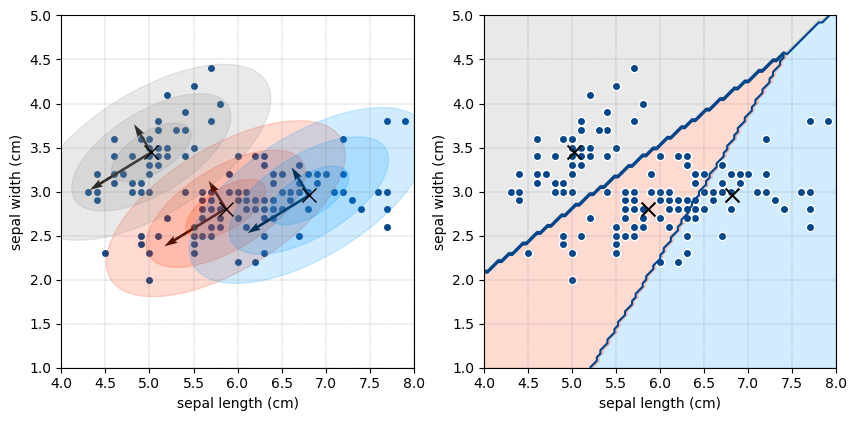

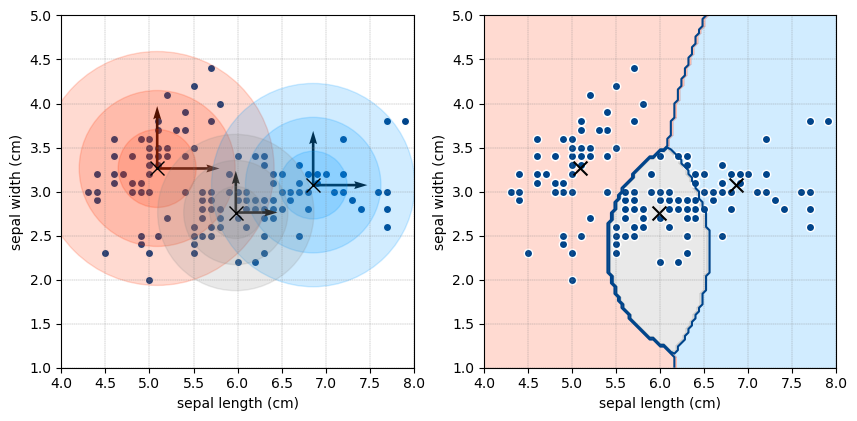

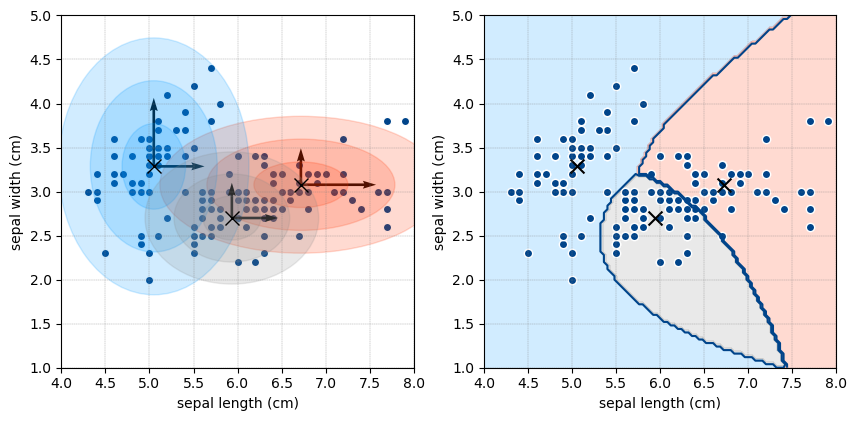

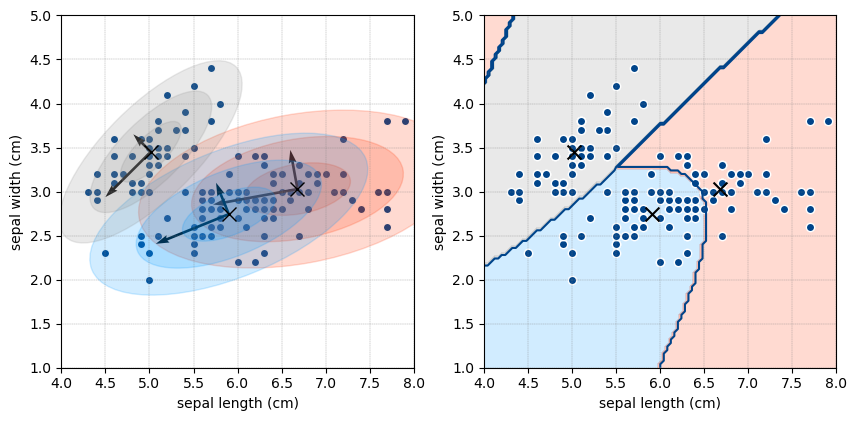

In [13]:
for covariance_type in covariance_types:
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=K, 
                          covariance_type=covariance_type)
    gmm.fit(X)

    # Predict cluster labels for the grid
    Z = gmm.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Visualization setup
    fig = plt.figure(figsize=(10, 5)) 
    
    # Left subplot: raw data with ellipses
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(x=X[:, 0], y=X[:, 1], 
               color=np.array([0, 68, 138]) / 255., 
               alpha=1.0,
               linewidth=1, edgecolor=[1,1,1])
    
    # Draw ellipses and eigenvectors
    make_ellipses(gmm, ax)
    ax.set_xlim(4, 8); ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_aspect('equal', adjustable='box')

    # Right subplot: decision boundary visualization
    ax = fig.add_subplot(1, 2, 2)
    ax.contourf(xx1, xx2, Z, cmap=cmap_bold, alpha=0.18)
    ax.contour(xx1, xx2, Z, levels=[0,1,2], 
               colors=np.array([0, 68, 138]) / 255.)
    ax.scatter(x=X[:, 0], y=X[:, 1], 
               color=np.array([0, 68, 138]) / 255., 
               alpha=1.0,
               linewidth=1, edgecolor=[1,1,1])

    # Plot GMM component centers
    centroids = gmm.means_
    ax.scatter(centroids[:, 0], centroids[:, 1], 
               marker="x", s=100, linewidths=1.5,
               color="k")    
    
    ax.set_xlim(4, 8); ax.set_ylim(1, 5)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5,0.5,0.5])
    ax.set_aspect('equal', adjustable='box')